In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# decision tree
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
#import graphviz

# SVC
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
# readin dataset
df = pd.read_csv('../data-201-resources-master/creditcardfraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# define X_train, X_test & Y_train, Y_test
X = pd.DataFrame()
X = df.drop(['Class'], axis=1)
Y = pd.DataFrame()
Y = df['Class']

trainSize = int(0.80*(X.shape[0]))
X_train = X.iloc[:trainSize, :]
X_test = X.iloc[trainSize:, :]
Y_train = Y.iloc[:trainSize]
Y_test = Y.iloc[trainSize:]

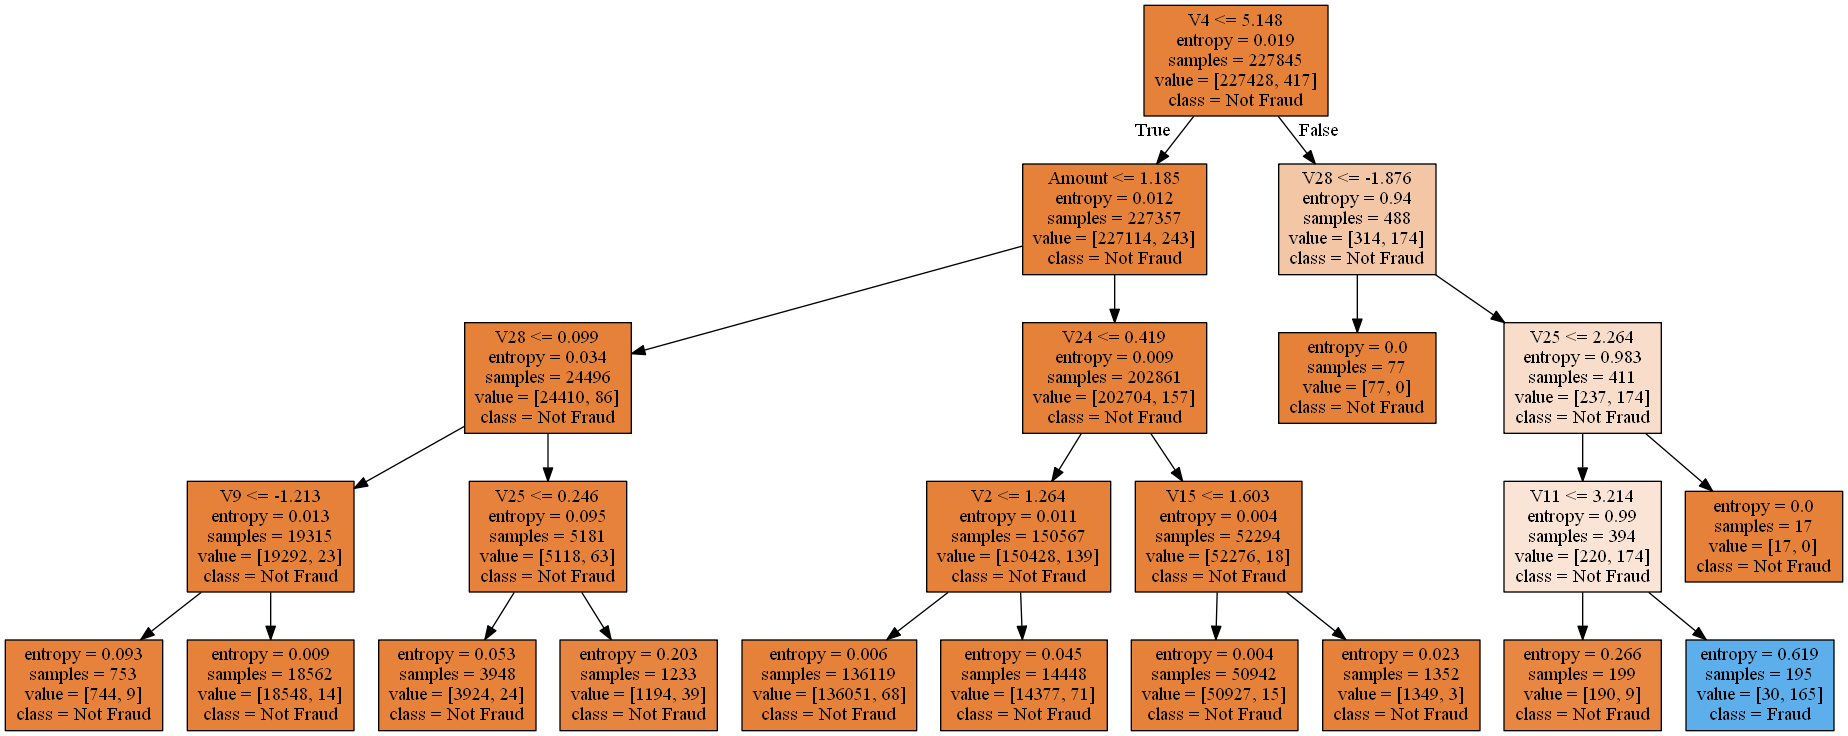

In [11]:
# use decision tree model
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, Y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Fraud', 'Fraud'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
print('training set score = {}'.format(decision_tree.score(X_train, Y_train)))
print('test set score = {}'.format(decision_tree.score(X_test, Y_test)))

training set score = 0.9987623164870855
test set score = 0.9990168884519505


In [13]:
cross_val_score(decision_tree, X_train, Y_train, cv=5)

array([0.9080264 , 0.99843755, 0.99708573, 0.9982093 , 0.99863064])

In [15]:
# calculate accuracy
out_matrix = confusion_matrix(Y_train, decision_tree.predict(X_train))
print('accuracy = {}'.format((out_matrix[0, 0] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('typeI error = {}'.format((out_matrix[0, 1] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('typeII error = {}'.format((out_matrix[1, 0] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('specificity = {}'.format((out_matrix[0, 0] / (out_matrix[0, 0] + out_matrix[0, 1]))))

accuracy = 0.9998680901208294
typeI error = 0.0001319098791705507
typeII error = 0.0011080429850326256
specificity = 0.9998680901208294
